In [1]:
import json
import os
import numpy
import pandas

from scipy.spatial import KDTree
from pnagm import util, nngraph, instance, test



In [2]:
# UPDATE PATH. WHERE CAN I FIND THE MICRONS CONNECTOME?
microns_connectome_prefix = "/Users/mwr/Documents/artefacts/connectomes"

with open("../configs/pnagm_L45E_microns.json", "r") as fid:
    cfg = json.load(fid)

cfg["make_points"]["fn"] = os.path.join(microns_connectome_prefix, cfg["make_points"]["fn"])

pts, microns = util.points_from_microns(cfg["make_points"])
reference = microns.matrix > 0

DD = test.DDtest(microns)

12881


/Users/mwr/Documents/repositories/local_connectivity_model/src/pnagm/test.py:41: RuntimeWarning: invalid value encountered in divide
  return H / self.h_all
/Users/mwr/Documents/repositories/local_connectivity_model/src/pnagm/test.py:51: RuntimeWarning: invalid value encountered in divide
  return H / self.h_2d_all[ij]


In [3]:
M = nngraph.point_nn_matrix(pts, **cfg["nngraph"])
mdl_instance, a, b = instance.build_instance(pts, M, **cfg["instance"])
inst_coo = mdl_instance.tocoo()

/Users/mwr/Documents/repositories/local_connectivity_model/src/pnagm/instance.py:16: RuntimeWarning: invalid value encountered in divide
  p = p_mat.data[a:b] / p_mat.data[a:b].sum()


In [8]:
import connalysis

mdl_params = connalysis.modelling.conn_prob_2nd_order_model(DD.m.matrix.tocsr(), DD.m.vertices, bin_size_um=25.0)
a = mdl_params["exp_model_scale"].iloc[0]
b = mdl_params["exp_model_exponent"].iloc[0]
ctrl_instance = connalysis.randomization.run_DD2(len(DD.m), a, b, DD.m.vertices[["x", "y", "z"]].values)

[2025-04-14 14:56:56,366] INFO: Running order-2 model building {'bin_size_um': 25.0, 'model_dir': None, 'data_dir': None, 'plot_dir': None, 'do_plot': False, 'part_idx': None, 'sample_seed': None}...
[2025-04-14 14:56:56,789] INFO: Extracting 1-dimensional (37) connection probabilities...


[2025-04-14 14:57:15,121] INFO: MODEL FIT: f(x) = 0.086752 * exp(-0.013115 * x)


/var/folders/py/wqmt8l2s5zb8fhrxbd_b258w0000gn/T/ipykernel_87358/3979542891.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(numpy.log10(DD.p_2d_ref[(1, 2)]), clim=(-5, -1))


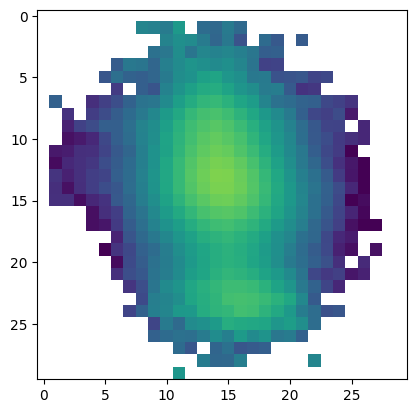

In [9]:
from matplotlib import pyplot as plt

plt.imshow(numpy.log10(DD.p_2d_ref[(1, 2)]), clim=(-5, -1))

/Users/mwr/Documents/repositories/local_connectivity_model/src/pnagm/test.py:51: RuntimeWarning: invalid value encountered in divide
  return H / self.h_2d_all[ij]
/var/folders/py/wqmt8l2s5zb8fhrxbd_b258w0000gn/T/ipykernel_87358/1211067217.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(numpy.log10(DD.twod_for_matrix(mdl_instance, (1, 2))), clim=(-5, -1))


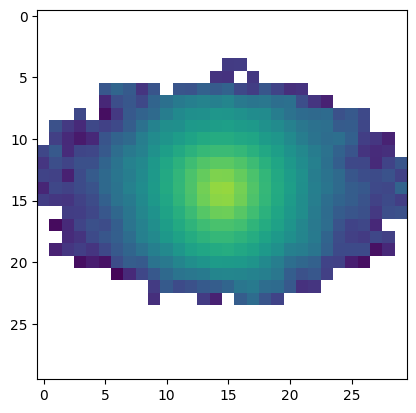

In [10]:
plt.imshow(numpy.log10(DD.twod_for_matrix(mdl_instance, (1, 2))), clim=(-5, -1))

/Users/mwr/Documents/repositories/local_connectivity_model/src/pnagm/test.py:41: RuntimeWarning: invalid value encountered in divide
  return H / self.h_all


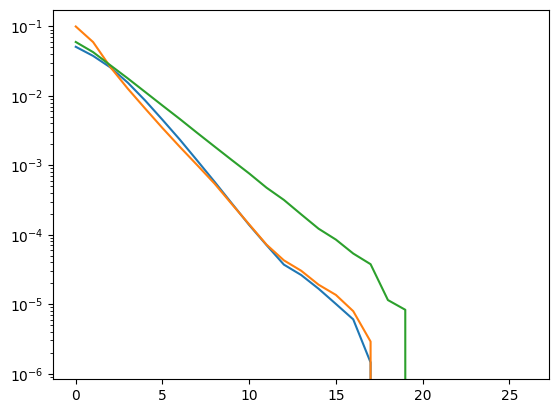

In [11]:
from matplotlib import pyplot as plt


plt.plot(DD.p_ref)
plt.plot(DD.for_matrix(mdl_instance))
plt.plot(DD.for_matrix(ctrl_instance))
plt.gca().set_yscale("log")

indegree_model     47.628290
indegree_ref       47.865305
outdegree_model    47.628290
outdegree_ref      47.865305
dtype: float64
indegree_model     65.957146
indegree_ref       47.865305
outdegree_model    65.957146
outdegree_ref      47.865305
dtype: float64


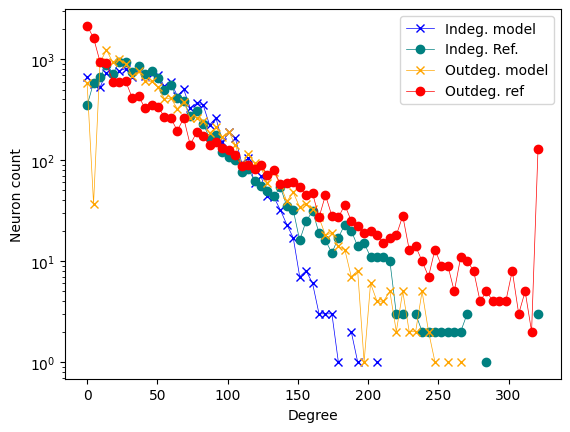

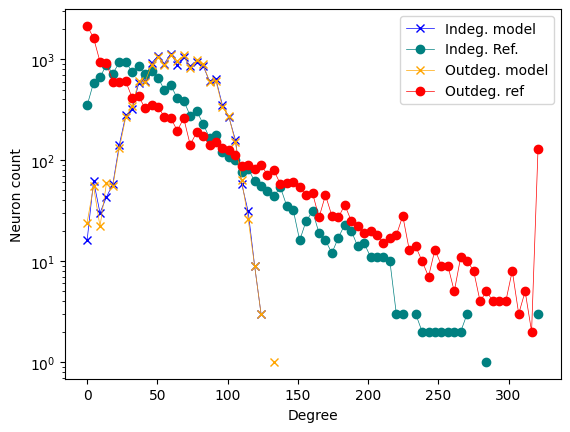

In [12]:
DD.plot_degree_distribution(mdl_instance)
DD.plot_degree_distribution(ctrl_instance)

/Users/mwr/Documents/repositories/local_connectivity_model/src/pnagm/test.py:107: RuntimeWarning: invalid value encountered in divide
  return H_x_con / H_x_all  # Probability that a neuron with connected NN is connected itself (per dist bin)


(-0.004979809423730132,
 0.1046078448015833,
 -0.007513912186809384,
 0.15779215592299706)

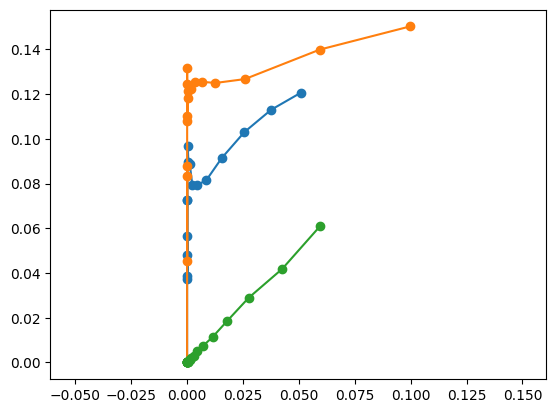

In [13]:
plt.plot(DD.p_ref, DD.dist_and_nn_analysis(DD.m.matrix), marker='o')
plt.plot(DD.for_matrix(mdl_instance), 
         DD.dist_and_nn_analysis(mdl_instance), marker='o')
plt.plot(DD.for_matrix(ctrl_instance), 
         DD.dist_and_nn_analysis(ctrl_instance), marker='o')
plt.axis("equal")

[2025-04-14 14:57:17,545] WARNING: No seed among keyword arguments
[2025-04-14 14:57:21,429] WARNING: No seed among keyword arguments
[2025-04-14 14:57:25,539] WARNING: No seed among keyword arguments
[2025-04-14 14:57:29,856] WARNING: No seed among keyword arguments


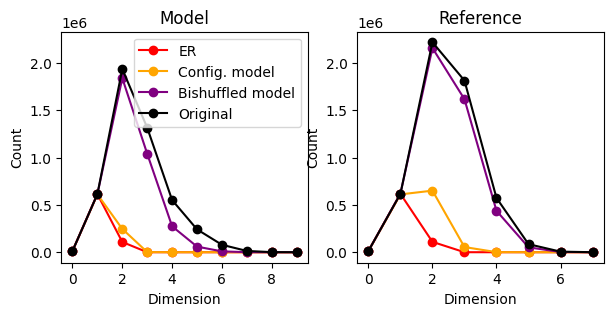

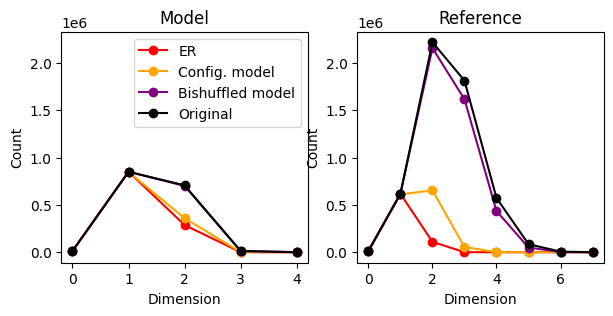

In [14]:
DD.plot_simplex_counts(mdl_instance)
DD.plot_simplex_counts(ctrl_instance)

In [15]:
display(connalysis.network.classic.common_neighbor_connectivity_bias(reference))

display(connalysis.network.classic.common_neighbor_connectivity_bias(mdl_instance))

display(connalysis.network.classic.common_neighbor_connectivity_bias(ctrl_instance))

(0.0, 12.382692875007386, 0.0)

(0.0, 12.019503479988526, 0.0)

(0.0, 1.256247394398183, 0.0)